In [55]:
# Combining Data Using Pandas

import pandas as pd
import numpy as np

happiness2015 = pd.read_csv("../dataset/World_Happiness_2015.csv")
happiness2016 = pd.read_csv("../dataset/World_Happiness_2016.csv")
happiness2017 = pd.read_csv("../dataset/World_Happiness_2017.csv")

happiness2015['Year'] = 2015
happiness2016['Year'] = 2016
happiness2017['Year'] = 2017

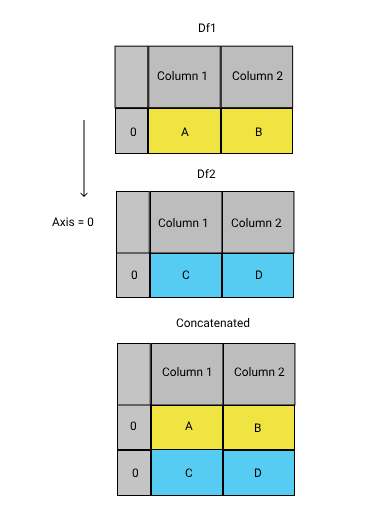

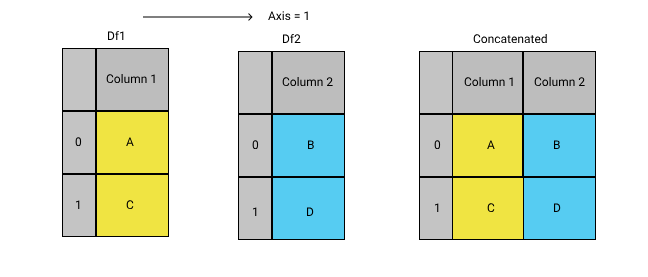

In [56]:
# Combining Dataframes with the Concat Function

head_2015 = happiness2015[['Country','Happiness Score', 'Year']].head(3)
head_2016 = happiness2016[['Country','Happiness Score', 'Year']].head(3)

concat_axis0 = pd.concat([head_2015, head_2016], axis = 0)
concat_axis1 = pd.concat([head_2015, head_2016], axis = 1)

question1 = concat_axis0.shape[0]
question2 = concat_axis1.shape[0]

print(question1, question2)

6 3


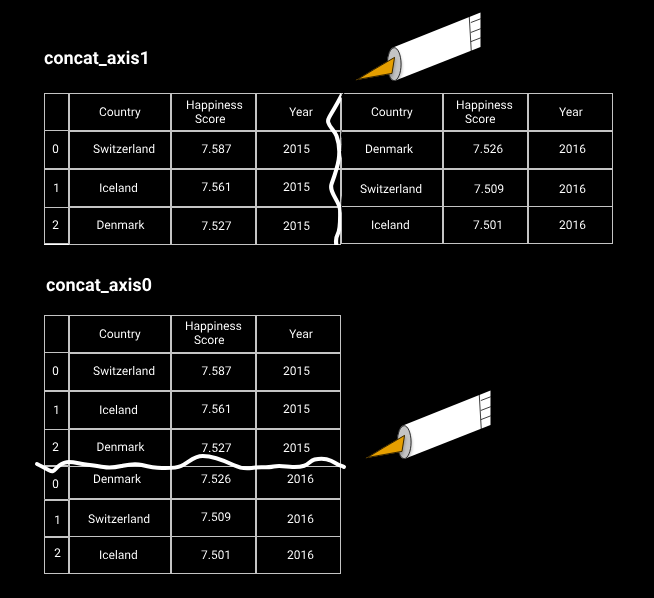

In [57]:
# Combining Dataframes with the Concat Function Continued

head_2015 = happiness2015[['Year', 'Country', 'Happiness Score', 'Standard Error']].head(4)
head_2016 = happiness2016[['Country','Happiness Score', 'Year']].head(3)

concat_axis0 = pd.concat([head_2015, head_2016], axis = 0)
concat_axis1 = pd.concat([head_2015, head_2016], axis = 1)

rows = concat_axis0.shape[0]
columns = concat_axis1.shape[0]

print(rows, columns)

7 4


In [58]:
# Combining Dataframes with Different Shapes Using the Concat Function

head_2015 = happiness2015[['Year', 'Country', 'Happiness Score', 'Standard Error']].head(4)
head_2016 = happiness2016[['Country','Happiness Score', 'Year']].head(3)

concat_update_index = pd.concat([head_2015, head_2016], ignore_index = True)
concat_update_index

,Year,Country,Happiness Score,Standard Error
0,2015,Switzerland,7.587,0.03411
1,2015,Iceland,7.561,0.04884
2,2015,Denmark,7.527,0.03328
3,2015,Norway,7.522,0.03880
4,2016,Denmark,7.526,NaN
5,2016,Switzerland,7.509,NaN
6,2016,Iceland,7.501,NaN


In [59]:
# Joining Dataframes with the Merge Function

three_2015 = happiness2015[['Country','Happiness Rank','Year']].iloc[2:5]
three_2016 = happiness2016[['Country','Happiness Rank','Year']].iloc[2:5]
merged = pd.merge(three_2015, three_2016, on = 'Country')

# O único país retornado em merged foi "Noruega" - o único elemento que apareceu na Country coluna em AMBOS three_2015 e three_2016.

In [60]:
# Joining on Columns with the Merge Function

three_2015 = happiness2015[['Country','Happiness Rank','Year']].iloc[2:5]
three_2016 = happiness2016[['Country','Happiness Rank','Year']].iloc[2:5]

merged_left = pd.merge(three_2015, three_2016, on = 'Country', how = 'left')
merged_left_updated = pd.merge(three_2016, three_2015, on = 'Country', how = 'left')


In [61]:
# Left Joins with the Merge Function

three_2015 = happiness2015[['Country','Happiness Rank','Year']].iloc[2:5]
three_2016 = happiness2016[['Country','Happiness Rank','Year']].iloc[2:5]

merged_suffixes = pd.merge(three_2015, three_2016, on = 'Country', how = 'left', suffixes = ('_2015', '_2016'))
merged_updated_suffixes = pd.merge(three_2016, three_2015, on = 'Country', how = 'left', suffixes = ('_2016', '_2015'))

In [62]:
# Join on Index with the Merge Function

four_2015 = happiness2015[['Country','Happiness Rank','Year']].iloc[2:6]
three_2016 = happiness2016[['Country','Happiness Rank','Year']].iloc[2:5]
merge_index = pd.merge(left=four_2015, right=three_2016, left_index=True, right_index=True, suffixes=('_2015','_2016'))

rows = merge_index.shape[0]
columns = merge_index.shape[1]

merge_index_left = pd.merge(left=four_2015, right=three_2016, left_index=True, right_index=True, suffixes=('_2015','_2016'), how = 'left')

rows = merge_index_left.shape[0]
columns = merge_index_left.shape[1]


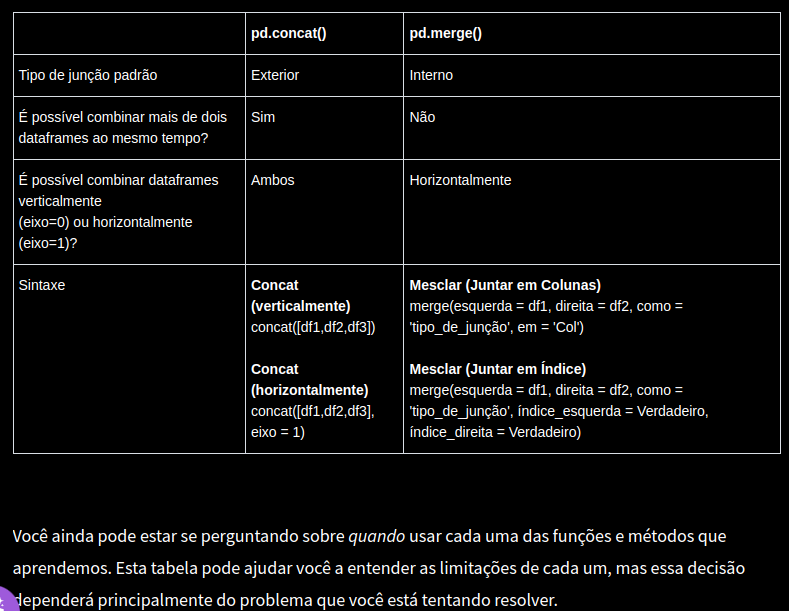

/tmp/ipykernel_504/3013101462.py:4: FutureWarning: The provided callable <function mean at 0x7dd2ba520fe0> is currently using DataFrameGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  means = happiness2015.pivot_table('Happiness Score', 'Region', aggfunc=np.mean)


<Axes: title={'center': 'Mean Happiness Scores by Region'}, ylabel='Region'>

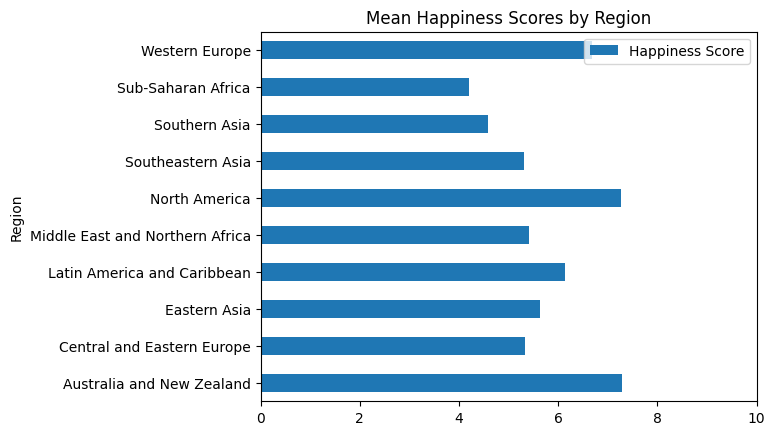

In [64]:
# Challenge: Combine Data and Create a Visualization

#Use a pivot table to aggregate the data according to Region.
means = happiness2015.pivot_table('Happiness Score', 'Region', aggfunc=np.mean)

#Use the `df.plot()` method to plot the results.
means.plot(kind='barh', title='Mean Happiness Scores by Region', xlim=(0,10))

<Axes: title={'center': 'Mean Happiness Scores by Year'}, ylabel='Happiness Score'>

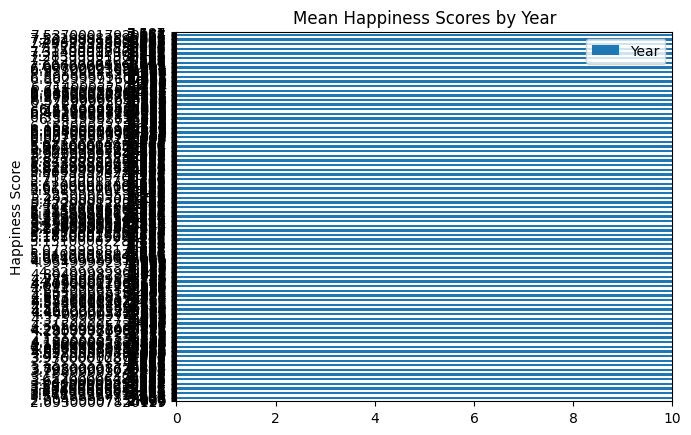

In [66]:
happiness2017.rename(columns={'Happiness.Score': 'Happiness Score'}, inplace=True)

combined = pd.concat([happiness2015, happiness2016, happiness2017], axis = 0)

pivot_table_combined = combined.pivot_table('Year', 'Happiness Score', aggfunc=np.mean)

pivot_table_combined.plot(kind = 'barh', title = 'Mean Happiness Scores by Year', xlim =(0,10))